# Capitulo 6 - Probabilidade

In [8]:
import random

def random_kid():
    return random.choice(['boy', 'girl'])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == 'girl':
        older_girl += 1
    if older == 'girl' and younger == 'girl':
        both_girls += 1
    if older == 'girl' or younger == 'girl':
        either_girl += 1

print("P(both | older): %.2f" % (both_girls / older_girl))
print("P(both | either): %.2f" % (both_girls / either_girl))

P(both | older): 0.50
P(both | either): 0.33


In [9]:
0.99 * (1/10000) / (0.99 * (1/10000) + 0.01 * (1 - 1/10000))

0.00980392156862745

#### Distribuicoes Continuas

In [10]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

In [41]:
def uniform_cdf(x):
    """P(x <= X)"""
    if x < 0: return 0
    elif x < 1: return x
    else: return 1

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns
#from scipy import stats, integrate

In [62]:
un = [uniform_cdf(0.05 * x) for x in range(-40, 40)]
x_values = [0.05 * x for x in range(-40, 40)]

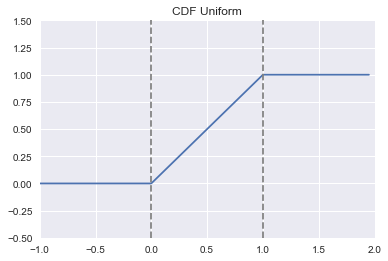

In [66]:
plt.plot(x_values, un)
plt.axvline(x=0, linestyle='--', color='grey')
plt.axvline(x=1, linestyle='--', color='grey')
plt.title("CDF Uniform")
plt.axis([-1, 2,
          -0.5, 1.5])
plt.show()

#### Distribuicao Normal

In [71]:
import math

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-((x - mu) ** 2) / (2 * (sigma ** 2))) / (sqrt_two_pi * sigma))

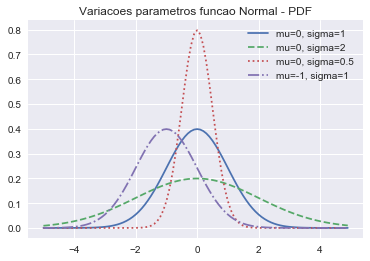

In [78]:
xs = [x / 10 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label="mu=0, sigma=1")
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label="mu=0, sigma=2")
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label="mu=0, sigma=0.5")
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label="mu=-1, sigma=1")
plt.legend()
plt.title("Variacoes parametros funcao Normal - PDF")
plt.show()

In [83]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / (math.sqrt(2) * sigma))) / 2

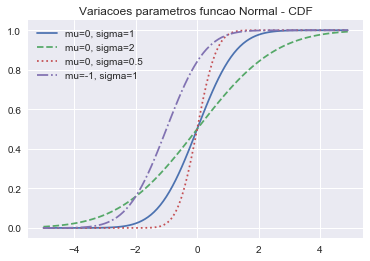

In [84]:
xs = [x / 10 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label="mu=0, sigma=1")
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label="mu=0, sigma=2")
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label="mu=0, sigma=0.5")
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label="mu=-1, sigma=1")
plt.legend()
plt.title("Variacoes parametros funcao Normal - CDF")
plt.show()

In [85]:
# busca binaria para inverter normal

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """econtra o inverso mais proximo usando busca binaria"""
    
    # se nao for a normal padrao, primeiro computa-se o padrao e depois redimensiona
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10, 0     # CDF(-10) da normal eh praticamente 0
    hi_z, hi_p = 10, 1        # CFD(10) da normal eh praticamente 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2    # ponto do meio
        mid_p = normal_cdf(mid_z)     # e calcula da CDF da normal la
        if mid_p < p:
            # o ponto do meio esta baixo, procurar acima
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # o ponto do meio esta alto, procurar abaixo
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    
    return mid_z
    

In [87]:
inverse_normal_cdf(0.5)

0.0

In [91]:
inverse_normal_cdf(0.975)

1.9599628448486328

#### Teorema do Limite Central

In [92]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

${Bernoulli(p)}$ tem media ${p}$ e desvio padrao ${\sqrt{p(1-p)}}$

O TLC diz que para ${n}$ grande, a ${Binomial(n, p)}$ se distribui aproximadamente como uma ${Normal(\mu, \sigma)}$ com media ${\mu=np}$ e desvio padrao ${\sigma=\sqrt{np(1-p)}}$

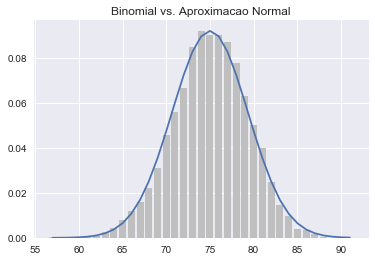

In [93]:
from collections import Counter

def make_hist(p, n, num_points):
    
    data = [binomial(n, p) for _ in range(num_points)]
    
    histogram = Counter(data)
    plt.bar([x for x in histogram.keys()], 
            [v / num_points for v in histogram.values()], 
            0.8, # espessura da barra
            color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) 
          for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial vs. Aproximacao Normal")
    plt.show()
    
make_hist(0.75, 100, 10000)